# Exoplanet Regression 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

### Cleaning Data

In [2]:
exoplanet_data_full = pd.read_csv('exoplanet_data.csv')

def merge(mass, mass_sini):
    if np.isnan(mass):
        return mass_sini
    return mass

exoplanet_data_full['MASS'] = exoplanet_data_full.apply(lambda row: merge(row['MASS'],row['MASS_SINI']), axis=1)
exoplanet_data=exoplanet_data_full.drop(columns = ['MASS_SINI','OMEGA','TIME_PERIAPSE','INCLINATION','STAR_AGE'])

In [3]:
exoplanet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 11 columns):
NAME                 4098 non-null object
MASS                 1922 non-null float64
SEMI_MAJOR_AXIS      2584 non-null float64
ORBITAL_PERIOD       3880 non-null float64
ECCENTRICITY         1526 non-null float64
PLANETARY_RADIUS     3036 non-null float64
DETECTION_TYPE       4096 non-null object
STAR_MASS            3676 non-null float64
STAR_TEMP            3769 non-null float64
STAR_RADIUS          3556 non-null float64
STAR_METALLICITIY    3583 non-null float64
dtypes: float64(9), object(2)
memory usage: 352.2+ KB


In [101]:
exoplanet_data = exoplanet_data.dropna().copy()

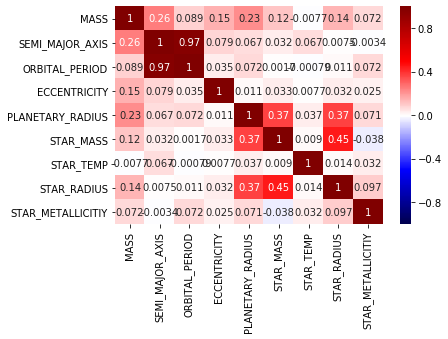

In [4]:
#Heatmap show that semi-major axis and orbital period are far too closely related, should remove one
sns.heatmap(exoplanet_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [5]:
#Research shows orbital period is typically directly measured, so removing semi-major-axis
exoplanet_data=exoplanet_data.drop(columns = 'SEMI_MAJOR_AXIS')

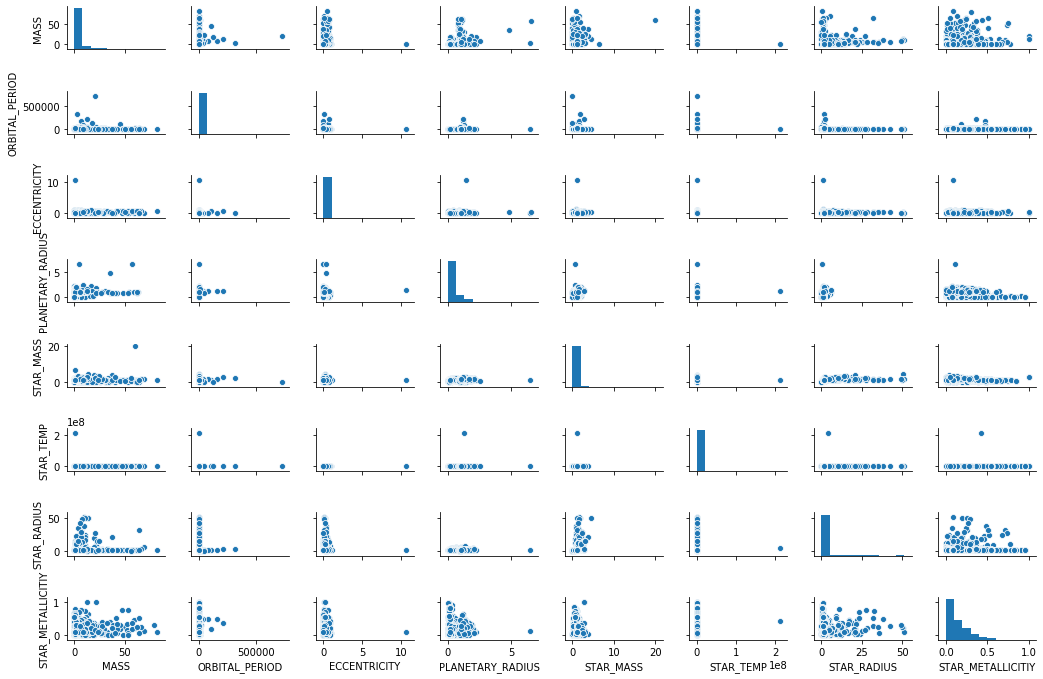

In [52]:
# Pairplot to check on data. Reveals clear outliers in multiple categories.
sns.pairplot(exoplanet_data, height=1.2, aspect=1.5);

In [103]:
#Filtering out the outliers revealed by pairplots
filter_outlier = exoplanet_data['STAR_TEMP'] < exoplanet_data.quantile([.99])['STAR_TEMP'].iloc[0]
exoplanet_data = exoplanet_data[filter_outlier]

filter_outlier = exoplanet_data['ORBITAL_PERIOD'] < exoplanet_data.quantile([.99])['ORBITAL_PERIOD'].iloc[0]
exoplanet_data = exoplanet_data[filter_outlier]

filter_outlier = exoplanet_data['ECCENTRICITY'] < exoplanet_data.quantile([.99])['ECCENTRICITY'].iloc[0]
exoplanet_data = exoplanet_data[filter_outlier]

filter_outlier = exoplanet_data['PLANETARY_RADIUS'] < exoplanet_data.quantile([.99])['PLANETARY_RADIUS'].iloc[0]
exoplanet_data = exoplanet_data[filter_outlier]

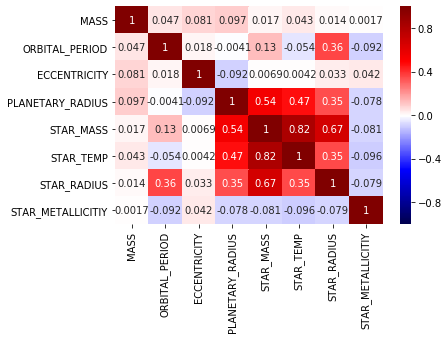

In [56]:
#Much more refined heatmap
sns.heatmap(exoplanet_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

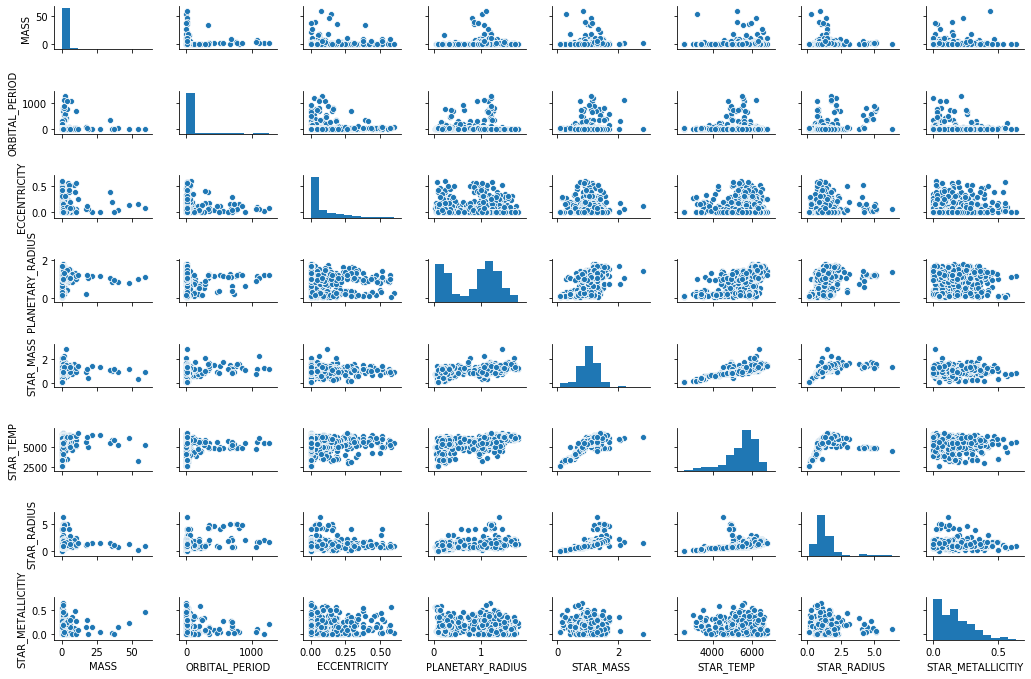

In [66]:
# Better pairplots
sns.pairplot(exoplanet_data, height=1.2, aspect=1.5);

In [104]:
# Create your feature matrix (X) and target vector (y)
yXstring = 'MASS ~ ORBITAL_PERIOD + ECCENTRICITY + PLANETARY_RADIUS + STAR_MASS + STAR_TEMP + STAR_RADIUS + STAR_METALLICITIY'
y, X = patsy.dmatrices(yXstring, data=exoplanet_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MASS   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.334
Date:                Fri, 12 Jul 2019   Prob (F-statistic):            0.00176
Time:                        14:18:33   Log-Likelihood:                -1548.2
No. Observations:                 494   AIC:                             3112.
Df Residuals:                     486   BIC:                             3146.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.8489      2.417     -2.420      0.016     -10.598      -1.100
ORBITAL_PERIOD        0.0077      0.004      2.036      0.042       0.000       0.015
ECCENTRICITY          6.0650      1.987      3.052      0.002       2.161       9.969
PLANETARY_RADIUS      0.7928      0.693      1.144      0.253      -0.569       2.155
STAR_MASS            -3.2457      2.176     -1.492      0.136      -7.520       1.029
STAR_TEMP             0.0017      0.001      2.500      0.013       0.000       0.003
STAR_RADIUS          -0.1163      0.592     -0.197      0.844      -1.279       1.046
STAR_METALLICITIY     1.8928      2.108      0.898      0.370      -2.249       6.034
==============================================================================
Omnibus:                      676.008   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75552.709
Skew:                           7.174   Prob(JB):                         0.00
Kurtosis:                      61.862   Cond. No.                     6.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Well that was an epic failure!

In [14]:
#Let's try by data type at least
radial_exoplanet_data=exoplanet_data_full.drop(columns = ['MASS_SINI','SEMI_MAJOR_AXIS','OMEGA','TIME_PERIAPSE','INCLINATION','STAR_AGE'])

In [16]:
radial_exoplanet_data.head()

,NAME,MASS,ORBITAL_PERIOD,ECCENTRICITY,PLANETARY_RADIUS,DETECTION_TYPE,STAR_MASS,STAR_TEMP,STAR_RADIUS,STAR_METALLICITIY
0,11 Com b,19.40,326.03,0.231,NaN,Radial Velocity,2.7000,4742.0,19.000,0.35
1,11 Oph b,21.00,730000.00,NaN,NaN,Imaging,0.0162,2375.0,NaN,NaN
2,11 UMi b,10.50,516.22,0.080,NaN,Radial Velocity,1.8000,4340.0,24.080,0.04
3,14 And b,5.33,185.84,0.000,NaN,Radial Velocity,2.2000,4813.0,11.000,0.24
4,14 Her b,4.64,1773.40,0.369,NaN,Radial Velocity,0.9000,5311.0,0.708,0.43


In [17]:
#Radial Velocity Measurements
radial_filter = radial_exoplanet_data['DETECTION_TYPE'] == 'Radial Velocity'
radial = radial_exoplanet_data[radial_filter]

#Other filters
filter_outlier = radial_exoplanet_data['STAR_TEMP'] < radial_exoplanet_data.quantile([.99])['STAR_TEMP'].iloc[0]
exoplanet_data = radial_exoplanet_data[filter_outlier]

filter_outlier = radial_exoplanet_data['ORBITAL_PERIOD'] < radial_exoplanet_data.quantile([.99])['ORBITAL_PERIOD'].iloc[0]
exoplanet_data = radial_exoplanet_data[filter_outlier]

filter_outlier = radial_exoplanet_data['ECCENTRICITY'] < radial_exoplanet_data.quantile([.99])['ECCENTRICITY'].iloc[0]
exoplanet_data = radial_exoplanet_data[filter_outlier]

filter_outlier = radial_exoplanet_data['PLANETARY_RADIUS'] < radial_exoplanet_data.quantile([.99])['PLANETARY_RADIUS'].iloc[0]
exoplanet_data = radial_exoplanet_data[filter_outlier]

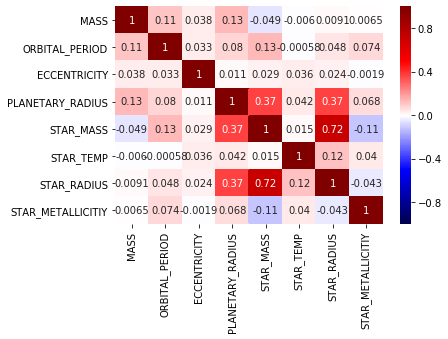

In [18]:
sns.heatmap(exoplanet_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

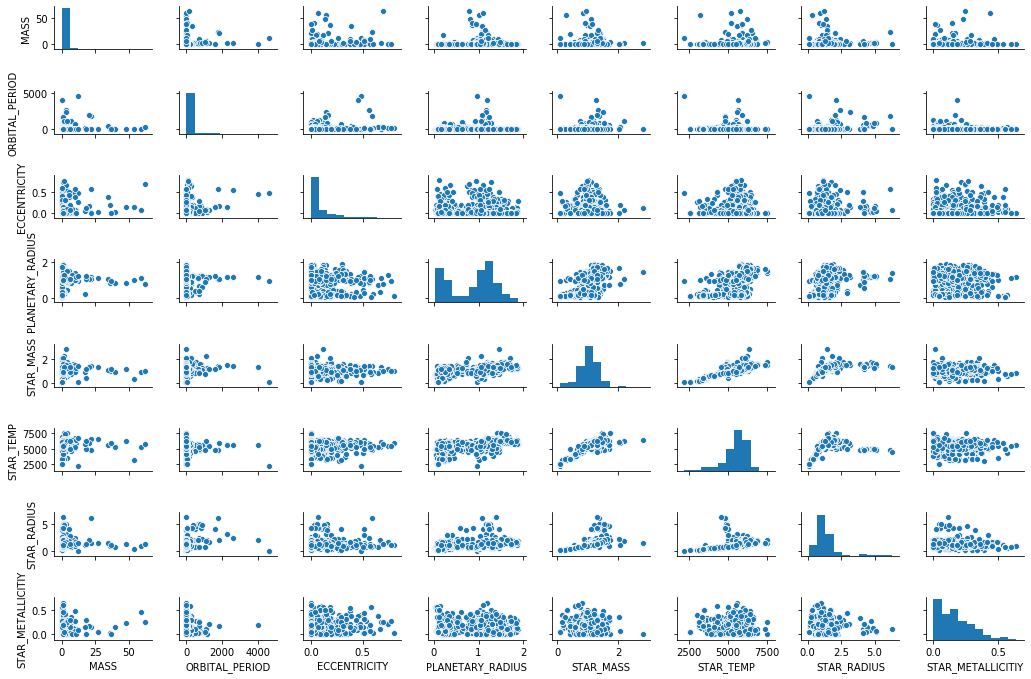

In [97]:
sns.pairplot(exoplanet_data, height=1.2, aspect=1.5);

In [19]:
# Create your feature matrix (X) and target vector (y)
yXstring = 'MASS ~ ORBITAL_PERIOD + ECCENTRICITY + PLANETARY_RADIUS + STAR_MASS + STAR_TEMP + STAR_RADIUS + STAR_METALLICITIY'
y, X = patsy.dmatrices(yXstring, data=radial_exoplanet_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MASS   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.054
Date:                Fri, 12 Jul 2019   Prob (F-statistic):             0.0468
Time:                        13:30:12   Log-Likelihood:                -1679.7
No. Observations:                 538   AIC:                             3375.
Df Residuals:                     530   BIC:                             3410.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.7129      2.220     -2.122      0.034      -9.075      -0.351
ORBITAL_PERIOD     3.029e-05   2.74e-05      1.104      0.270   -2.36e-05    8.42e-05
ECCENTRICITY          0.2744      0.498      0.551      0.582      -0.704       1.252
PLANETARY_RADIUS      0.2277      0.525      0.434      0.664      -0.803       1.258
STAR_MASS            -2.8100      2.042     -1.376      0.169      -6.822       1.202
STAR_TEMP             0.0015      0.001      2.415      0.016       0.000       0.003
STAR_RADIUS           0.5008      0.512      0.978      0.329      -0.505       1.507
STAR_METALLICITIY     1.6415      2.004      0.819      0.413      -2.295       5.578
==============================================================================
Omnibus:                      750.532   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97527.668
Skew:                           7.462   Prob(JB):                         0.00
Kurtosis:                      67.249   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
transit_exoplanet_data=exoplanet_data_full.drop(columns = ['MASS_SINI','SEMI_MAJOR_AXIS','OMEGA','TIME_PERIAPSE','INCLINATION','STAR_AGE'])

In [25]:
#Transit Data Measurements
transit_filter = transit_exoplanet_data['DETECTION_TYPE'] == 'Primary Transit'
transit_exoplanet_data = transit_exoplanet_data[transit_filter]

#Other filters
filter_outlier = transit_exoplanet_data['STAR_TEMP'] < transit_exoplanet_data.quantile([.99])['STAR_TEMP'].iloc[0]
transit_exoplanet_data = transit_exoplanet_data[filter_outlier]

filter_outlier = transit_exoplanet_data['ORBITAL_PERIOD'] < transit_exoplanet_data.quantile([.99])['ORBITAL_PERIOD'].iloc[0]
transit_exoplanet_data = transit_exoplanet_data[filter_outlier]

filter_outlier = transit_exoplanet_data['ECCENTRICITY'] < transit_exoplanet_data.quantile([.99])['ECCENTRICITY'].iloc[0]
transit_exoplanet_data = transit_exoplanet_data[filter_outlier]

filter_outlier = transit_exoplanet_data['PLANETARY_RADIUS'] < transit_exoplanet_data.quantile([.99])['PLANETARY_RADIUS'].iloc[0]
transit_exoplanet_data = transit_exoplanet_data[filter_outlier]

In [27]:
# Create your feature matrix (X) and target vector (y)
yXstring = 'MASS ~ ORBITAL_PERIOD + ECCENTRICITY + PLANETARY_RADIUS + STAR_MASS + STAR_TEMP + STAR_RADIUS + STAR_METALLICITIY'
y, X = patsy.dmatrices(yXstring, data=transit_exoplanet_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MASS   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.490
Date:                Fri, 12 Jul 2019   Prob (F-statistic):              0.169
Time:                        13:32:28   Log-Likelihood:                -1424.8
No. Observations:                 469   AIC:                             2866.
Df Residuals:                     461   BIC:                             2899.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.8540      2.239     -1.722      0.086      -8.253       0.545
ORBITAL_PERIOD       -0.0051      0.010     -0.523      0.601      -0.024       0.014
ECCENTRICITY          1.8928      1.925      0.983      0.326      -1.889       5.675
PLANETARY_RADIUS      0.4504      0.655      0.688      0.492      -0.837       1.737
STAR_MASS            -1.3409      2.015     -0.665      0.506      -5.301       2.619
STAR_TEMP             0.0012      0.001      1.845      0.066   -7.54e-05       0.002
STAR_RADIUS          -0.1210      0.593     -0.204      0.838      -1.286       1.044
STAR_METALLICITIY     1.0463      1.968      0.532      0.595      -2.821       4.913
==============================================================================
Omnibus:                      663.883   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86556.969
Skew:                           7.510   Prob(JB):                         0.00
Kurtosis:                      67.836   Cond. No.                     6.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
exoplanet_data_full.columns

Index(['NAME', 'MASS', 'MASS_SINI', 'SEMI_MAJOR_AXIS', 'ORBITAL_PERIOD',
       'ECCENTRICITY', 'OMEGA', 'TIME_PERIAPSE', 'PLANETARY_RADIUS',
       'INCLINATION', 'DETECTION_TYPE', 'STAR_MASS', 'STAR_AGE', 'STAR_TEMP',
       'STAR_RADIUS', 'STAR_METALLICITIY'],
      dtype='object')

In [37]:
important_data=exoplanet_data_full.drop(columns = ['MASS_SINI', 'ECCENTRICITY','ORBITAL_PERIOD','OMEGA', 'TIME_PERIAPSE',
       'INCLINATION', 'DETECTION_TYPE', 'STAR_AGE', 'STAR_TEMP', 'STAR_METALLICITIY'])

In [30]:
important_data.head()

,NAME,MASS,SEMI_MAJOR_AXIS,ECCENTRICITY,PLANETARY_RADIUS,STAR_MASS,STAR_RADIUS
0,11 Com b,19.40,1.29,0.231,NaN,2.7000,19.000
1,11 Oph b,21.00,243.00,NaN,NaN,0.0162,NaN
2,11 UMi b,10.50,1.54,0.080,NaN,1.8000,24.080
3,14 And b,5.33,0.83,0.000,NaN,2.2000,11.000
4,14 Her b,4.64,2.77,0.369,NaN,0.9000,0.708


In [38]:
filter_outlier = important_data['SEMI_MAJOR_AXIS'] < important_data.quantile([.95])['SEMI_MAJOR_AXIS'].iloc[0]
important_data = important_data[filter_outlier]

filter_outlier = important_data['PLANETARY_RADIUS'] < important_data.quantile([.99])['PLANETARY_RADIUS'].iloc[0]
important_data = important_data[filter_outlier]

In [40]:
yXstring = 'MASS ~ SEMI_MAJOR_AXIS + PLANETARY_RADIUS + STAR_MASS + STAR_RADIUS'
y, X = patsy.dmatrices(yXstring, data=important_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MASS   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           7.24e-09
Time:                        13:44:40   Log-Likelihood:                -2150.6
No. Observations:                 695   AIC:                             4311.
Df Residuals:                     690   BIC:                             4334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3461      0.727      1.853      0.064      -0.081       2.773
SEMI_MAJOR_AXIS      2.2369      0.413      5.416      0.000       1.426       3.048
PLANETARY_RADIUS     1.7890      0.503      3.557      0.000       0.802       2.776
STAR_MASS           -1.1042      0.993     -1.113      0.266      -3.053       0.845
STAR_RADIUS         -0.2543      0.391     -0.651      0.515      -1.021       0.513
==============================================================================
Omnibus:                      920.810   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109485.508
Skew:                           7.026   Prob(JB):                         0.00
Kurtosis:                      62.861   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

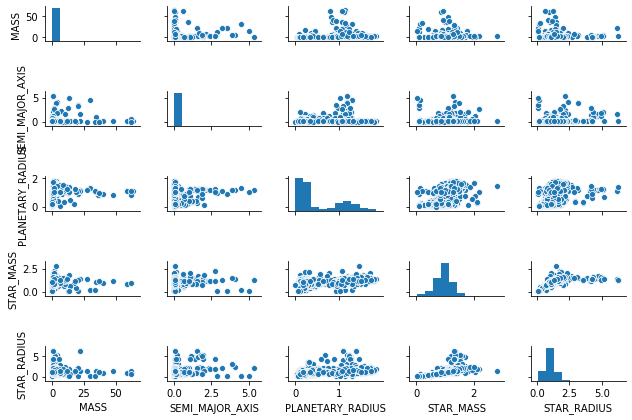

In [41]:
sns.pairplot(important_data, height=1.2, aspect=1.5);

In [95]:
stellar_data=exoplanet_data_full.drop(columns = ['MASS','MASS_SINI', 'SEMI_MAJOR_AXIS', 'ORBITAL_PERIOD',
       'ECCENTRICITY', 'OMEGA', 'TIME_PERIAPSE',
       'INCLINATION', 'DETECTION_TYPE','STAR_METALLICITIY'])

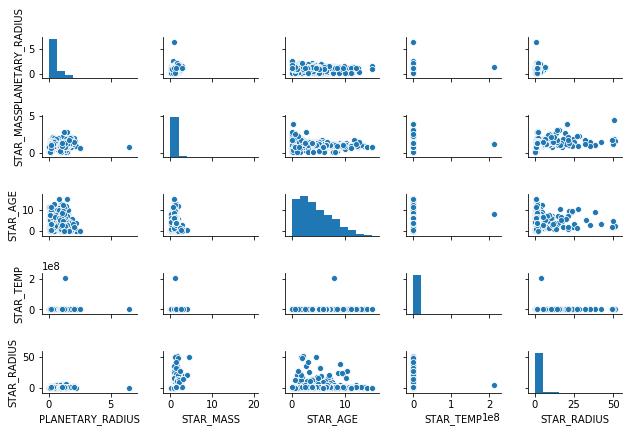

In [53]:
sns.pairplot(stellar_data, height=1.2, aspect=1.5);

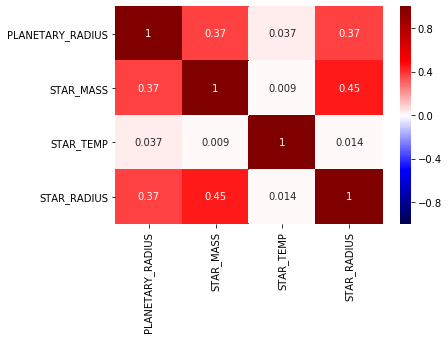

In [60]:
sns.heatmap(stellar_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [93]:
filter_outlier = stellar_data['STAR_TEMP'] < stellar_data.quantile([.99])['STAR_TEMP'].iloc[0]
stellar_data = stellar_data[filter_outlier]

filter_outlier = stellar_data['PLANETARY_RADIUS'] < stellar_data.quantile([.99])['PLANETARY_RADIUS'].iloc[0]
stellar_data = stellar_data[filter_outlier]

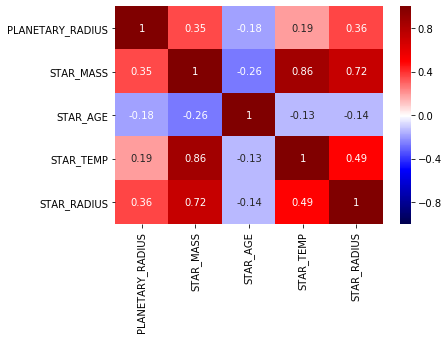

In [90]:
sns.heatmap(stellar_data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [105]:
yXstring = 'PLANETARY_RADIUS ~ STAR_MASS + STAR_AGE + STAR_TEMP + STAR_RADIUS'
y, X = patsy.dmatrices(yXstring, data=stellar_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PLANETARY_RADIUS   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     59.32
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           5.16e-42
Time:                        14:19:02   Log-Likelihood:                -348.84
No. Observations:                 587   AIC:                             707.7
Df Residuals:                     582   BIC:                             729.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0174      0.083      0.210      0.834      -0.145       0.180
STAR_MASS       0.8525      0.083     10.309      0.000       0.690       1.015
STAR_AGE       -0.0100      0.006     -1.590      0.112      -0.022       0.002
STAR_TEMP    1.463e-09   2.13e-09      0.685      0.493   -2.73e-09    5.66e-09
STAR_RADIUS     0.0173      0.035      0.501      0.617      -0.051       0.085
==============================================================================
Omnibus:                       26.048   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.214
Skew:                          -0.292   Prob(JB):                     0.000183
Kurtosis:                       2.398   Cond. No.                     5.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
stellar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 6 columns):
NAME                4098 non-null object
PLANETARY_RADIUS    3036 non-null float64
STAR_MASS           3676 non-null float64
STAR_AGE            1194 non-null float64
STAR_TEMP           3769 non-null float64
STAR_RADIUS         3556 non-null float64
dtypes: float64(5), object(1)
memory usage: 192.2+ KB


In [108]:
stellar_data2 = stellar_data.dropna().copy()

In [110]:
stellar_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 7 to 4087
Data columns (total 6 columns):
NAME                587 non-null object
PLANETARY_RADIUS    587 non-null float64
STAR_MASS           587 non-null float64
STAR_AGE            587 non-null float64
STAR_TEMP           587 non-null float64
STAR_RADIUS         587 non-null float64
dtypes: float64(5), object(1)
memory usage: 32.1+ KB


In [109]:
yXstring = 'PLANETARY_RADIUS ~ STAR_MASS + STAR_AGE + STAR_TEMP + STAR_RADIUS'
y, X = patsy.dmatrices(yXstring, data=stellar_data2, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PLANETARY_RADIUS   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     59.32
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           5.16e-42
Time:                        14:19:41   Log-Likelihood:                -348.84
No. Observations:                 587   AIC:                             707.7
Df Residuals:                     582   BIC:                             729.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0174      0.083      0.210      0.834      -0.145       0.180
STAR_MASS       0.8525      0.083     10.309      0.000       0.690       1.015
STAR_AGE       -0.0100      0.006     -1.590      0.112      -0.022       0.002
STAR_TEMP    1.463e-09   2.13e-09      0.685      0.493   -2.73e-09    5.66e-09
STAR_RADIUS     0.0173      0.035      0.501      0.617      -0.051       0.085
==============================================================================
Omnibus:                       26.048   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.214
Skew:                          -0.292   Prob(JB):                     0.000183
Kurtosis:                       2.398   Cond. No.                     5.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
radius_data=exoplanet_data_full.drop(columns = ['MASS_SINI'])

In [65]:
exoplanet_data_full.columns

Index(['NAME', 'MASS', 'MASS_SINI', 'SEMI_MAJOR_AXIS', 'ORBITAL_PERIOD',
       'ECCENTRICITY', 'OMEGA', 'TIME_PERIAPSE', 'PLANETARY_RADIUS',
       'INCLINATION', 'DETECTION_TYPE', 'STAR_MASS', 'STAR_AGE', 'STAR_TEMP',
       'STAR_RADIUS', 'STAR_METALLICITIY'],
      dtype='object')

In [66]:
yXstring = 'PLANETARY_RADIUS ~ MASS + SEMI_MAJOR_AXIS+ ORBITAL_PERIOD + ECCENTRICITY + OMEGA + TIME_PERIAPSE + INCLINATION + STAR_MASS + STAR_AGE + STAR_TEMP + STAR_RADIUS + STAR_METALLICITIY'

y, X = patsy.dmatrices(yXstring, data=radius_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PLANETARY_RADIUS   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.118
Date:                Fri, 12 Jul 2019   Prob (F-statistic):              0.421
Time:                        14:03:03   Log-Likelihood:                -5.2658
No. Observations:                  26   AIC:                             36.53
Df Residuals:                      13   BIC:                             52.89
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.4618      3.291     -1.660      0.121     -12.571       1.648
MASS                 -0.0253      0.012     -2.181      0.048      -0.050      -0.000
SEMI_MAJOR_AXIS      -6.4216      6.208     -1.034      0.320     -19.833       6.990
ORBITAL_PERIOD        0.0132      0.012      1.062      0.308      -0.014       0.040
ECCENTRICITY          0.3277      0.809      0.405      0.692      -1.420       2.075
OMEGA                -0.0020      0.001     -2.035      0.063      -0.004       0.000
TIME_PERIAPSE      1.475e-08   1.99e-07      0.074      0.942   -4.15e-07    4.44e-07
INCLINATION           0.0110      0.013      0.865      0.403      -0.016       0.038
STAR_MASS            -6.0690      2.791     -2.175      0.049     -12.098      -0.040
STAR_AGE             -0.1080      0.057     -1.898      0.080      -0.231       0.015
STAR_TEMP             0.0021      0.001      2.250      0.042    8.47e-05       0.004
STAR_RADIUS           0.6582      0.524      1.255      0.232      -0.475       1.791
STAR_METALLICITIY     2.9555      1.845      1.602      0.133      -1.030       6.941
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   2.745
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                1.534
Skew:                          -0.285   Prob(JB):                        0.464
Kurtosis:                       4.045   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
radius_data=exoplanet_data_full.drop(columns = ['MASS_SINI', 'SEMI_MAJOR_AXIS', 'ORBITAL_PERIOD',
       'ECCENTRICITY', 'OMEGA', 'TIME_PERIAPSE',
       'INCLINATION', 'DETECTION_TYPE','STAR_METALLICITIY'])

In [79]:
radius_data.head()

,NAME,MASS,PLANETARY_RADIUS,STAR_MASS,STAR_AGE,STAR_TEMP,STAR_RADIUS
0,11 Com b,19.40,NaN,2.7000,NaN,4742.0,19.000
1,11 Oph b,21.00,NaN,0.0162,0.011,2375.0,NaN
2,11 UMi b,10.50,NaN,1.8000,1.560,4340.0,24.080
3,14 And b,5.33,NaN,2.2000,NaN,4813.0,11.000
4,14 Her b,4.64,NaN,0.9000,5.100,5311.0,0.708


In [81]:
radius_data = radius_data.dropna()

In [86]:
radius_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 7 columns):
NAME                4098 non-null object
MASS                1922 non-null float64
PLANETARY_RADIUS    3036 non-null float64
STAR_MASS           3676 non-null float64
STAR_AGE            1194 non-null float64
STAR_TEMP           3769 non-null float64
STAR_RADIUS         3556 non-null float64
dtypes: float64(6), object(1)
memory usage: 224.2+ KB


In [98]:
yXstring = 'PLANETARY_RADIUS ~ MASS + STAR_MASS + STAR_TEMP + STAR_RADIUS'

y, X = patsy.dmatrices(yXstring, data=radius_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PLANETARY_RADIUS   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     69.84
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.10e-50
Time:                        14:17:19   Log-Likelihood:                -557.20
No. Observations:                 799   AIC:                             1124.
Df Residuals:                     794   BIC:                             1148.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0231      0.059     -0.394      0.694      -0.138       0.092
MASS            0.0116      0.003      4.017      0.000       0.006       0.017
STAR_MASS       0.8104      0.071     11.453      0.000       0.671       0.949
STAR_TEMP    1.174e-09   2.34e-09      0.501      0.617   -3.43e-09    5.78e-09
STAR_RADIUS     0.0315      0.031      1.006      0.315      -0.030       0.093
==============================================================================
Omnibus:                      465.385   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19641.858
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      26.970   Cond. No.                     3.87e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
radius_data = radius_data.dropna()

In [100]:
yXstring = 'PLANETARY_RADIUS ~ MASS + STAR_MASS + STAR_TEMP + STAR_RADIUS'

y, X = patsy.dmatrices(yXstring, data=radius_data, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PLANETARY_RADIUS   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     46.30
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           1.99e-33
Time:                        14:17:35   Log-Likelihood:                -308.69
No. Observations:                 541   AIC:                             627.4
Df Residuals:                     536   BIC:                             648.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0371      0.072      0.516      0.606      -0.104       0.178
MASS            0.0061      0.003      2.074      0.039       0.000       0.012
STAR_MASS       0.8228      0.083      9.964      0.000       0.661       0.985
STAR_TEMP    1.238e-09   2.09e-09      0.594      0.553   -2.86e-09    5.33e-09
STAR_RADIUS     0.0119      0.034      0.350      0.726      -0.055       0.078
==============================================================================
Omnibus:                       22.097   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.740
Skew:                          -0.404   Prob(JB):                     5.17e-05
Kurtosis:                       2.528   Cond. No.                     5.23e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""